In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#import data vào python
data = pd.read_csv('../data/winequality-red.csv')

In [3]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


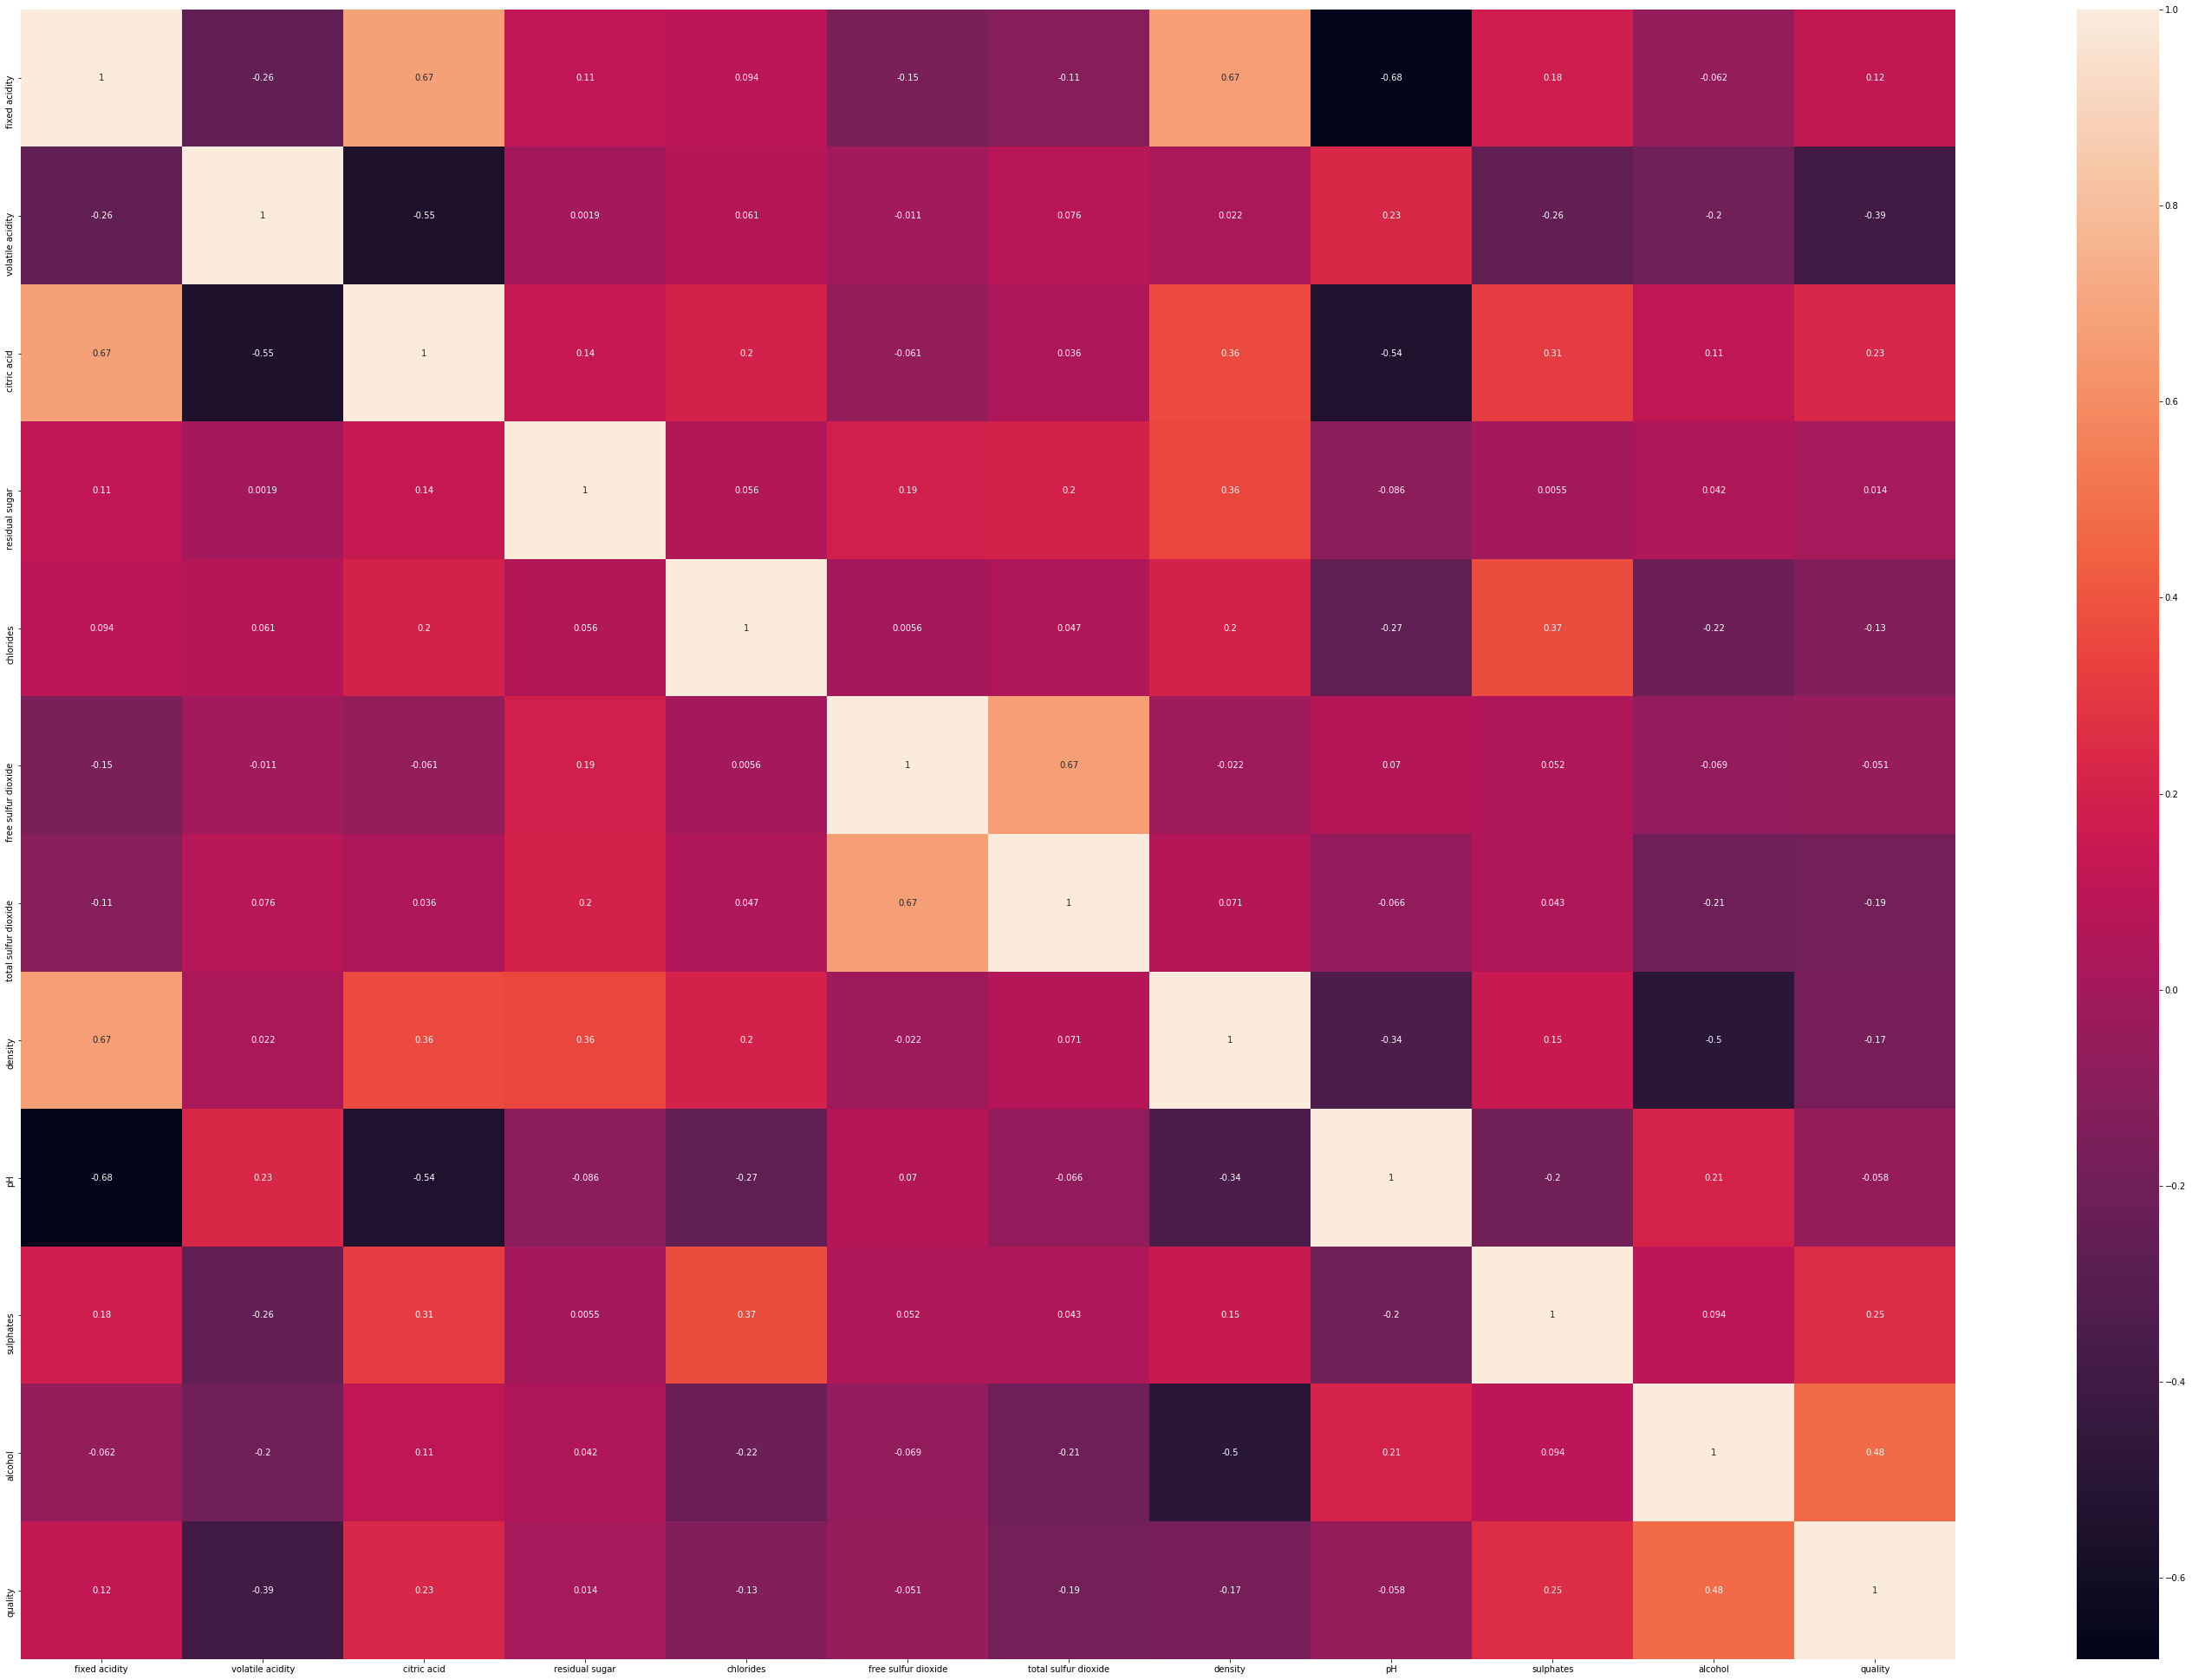

In [5]:
#Ve bieu do tuong quan de xem cac bien co tuong quan voi nhau hay khong
plt.figure(figsize=(50,35))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.savefig('corr.png')

### Nhin vào hình trên ta thấy:
- Biến fixed acidity và citric acid có độ tương quan tương đối cao (bằng 0.67)
- Biến fixed acidity và density acid có độ tương quan tương đối cao (bằng 0.67)
- Biến free sulfur dioxide và total sulfur dioxide có độ tương quan tương đối cao (bằng 0.67)
- Từ đó, ta tiến hành vẽ biểu đồ bar để xem các biến trên có quan hệ như thế nào với biến Target, từ đó xem xét nên loại biến nào

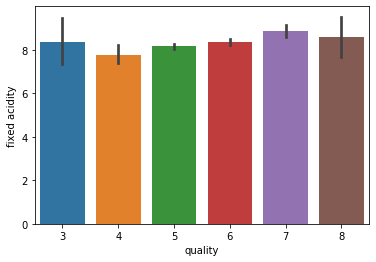

In [6]:
# so sánh biến fixed acidity với biến quality. Biến fixed acidity không đặc điểm nào để phân loại chất lượng
sns.barplot(x=data['quality'], y=data['fixed acidity'])

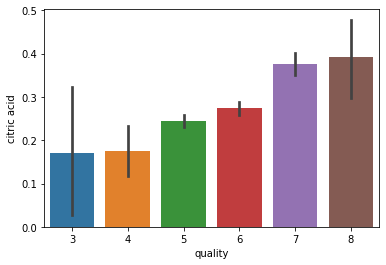

In [7]:
# so sánh biến citric acid với biến quality. Ta thấy chất citric acid càng tăng thì chất lượng rượu càng tăng.
sns.barplot(x=data['quality'], y=data['citric acid'])

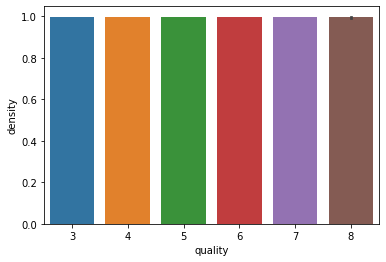

In [8]:
# so sánh biến density với biến quality.
sns.barplot(x=data['quality'], y=data['density'])

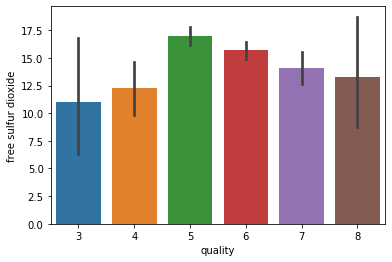

In [9]:
# so sánh biến free sulfur dioxide với biến quality.
sns.barplot(x=data['quality'], y=data['free sulfur dioxide'])

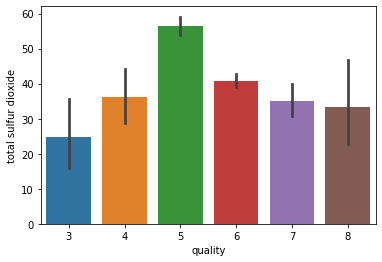

In [10]:
# so sánh biến total sulfur dioxide với biến quality.
sns.barplot(x=data['quality'], y=data['total sulfur dioxide'])

In [11]:
# Từ các hình trên, ta chọn ra biến ít tác động đến quality nhất để loại bỏ.
data.drop(["fixed acidity", 'total sulfur dioxide'], axis=1, inplace=True)

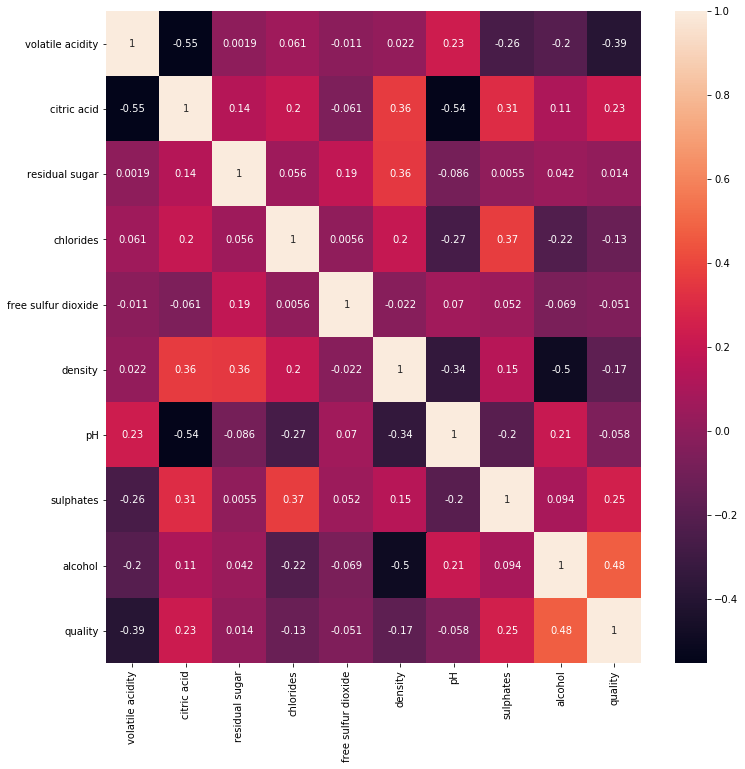

In [12]:
# Ve lại biểu đồ tương quan
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(method='pearson'), annot=True)

In [13]:
# Chia giỏ cho biến target thành 2 khoảng: từ [2,6) =>bad, [6,8]=>good
bins = (2,6,8)
group_names = ['bad', 'good']

In [14]:
data['quality'] = pd.cut(data['quality'], bins=bins, labels=group_names)

In [15]:
data.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  density    pH  sulphates  alcohol quality  
0                 11.0   0.9978  3.51       0.56      9.4     bad  
1                 25.0   0.9968  3.20       0.68      9.8     bad  
2                 15.0   0.9970  3.26       0.65      9.8     bad  
3                 17.0   0.9980  3.16       0.58      9.8     bad  
4                 11.0   0.9978  3.51       0.56      9.4     bad

In [16]:
# Chia dữ liệu thành 2 phần, những biến độc lập X, biến phụ thuộc Y
X = data.drop('quality', axis=1)
y = data['quality']

In [17]:
#Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [18]:
#Tạo cây ID3
clf = DecisionTreeClassifier(criterion='entropy')

In [19]:
#Dua dữ liệu train vào cây để tạo ra mô hình
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
#Dự đoán tập test trên mô hình vừa mới tạo
pred = clf.predict(X_test)

In [21]:
#Tinh độ chính xác của mô hình
tree_score = metrics.accuracy_score(pred, y_test)

In [22]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(pred, y_test))

Accuracy:  0.875
Report:                precision    recall  f1-score   support

         bad       0.91      0.94      0.93       397
        good       0.67      0.54      0.60        83

    accuracy                           0.88       480
   macro avg       0.79      0.74      0.76       480
weighted avg       0.87      0.88      0.87       480



In [23]:
#Tạo ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, pred)

Text(0.5, 1, 'Decision Tree Accuracy score: 0.88')

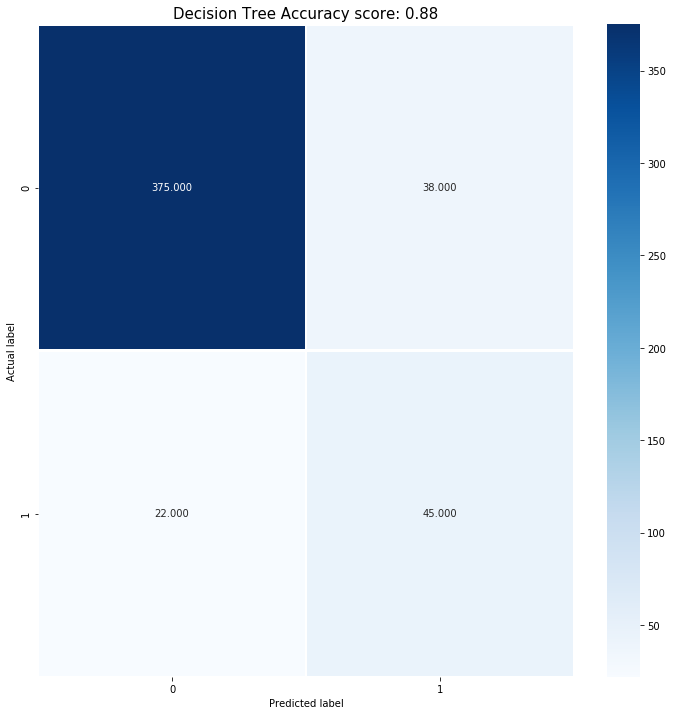

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt='.3f', cmap='Blues', linewidths=1.5)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy score: {0}'.format(round(tree_score,2))
plt.title(title, size=15)

In [25]:
from sklearn import tree

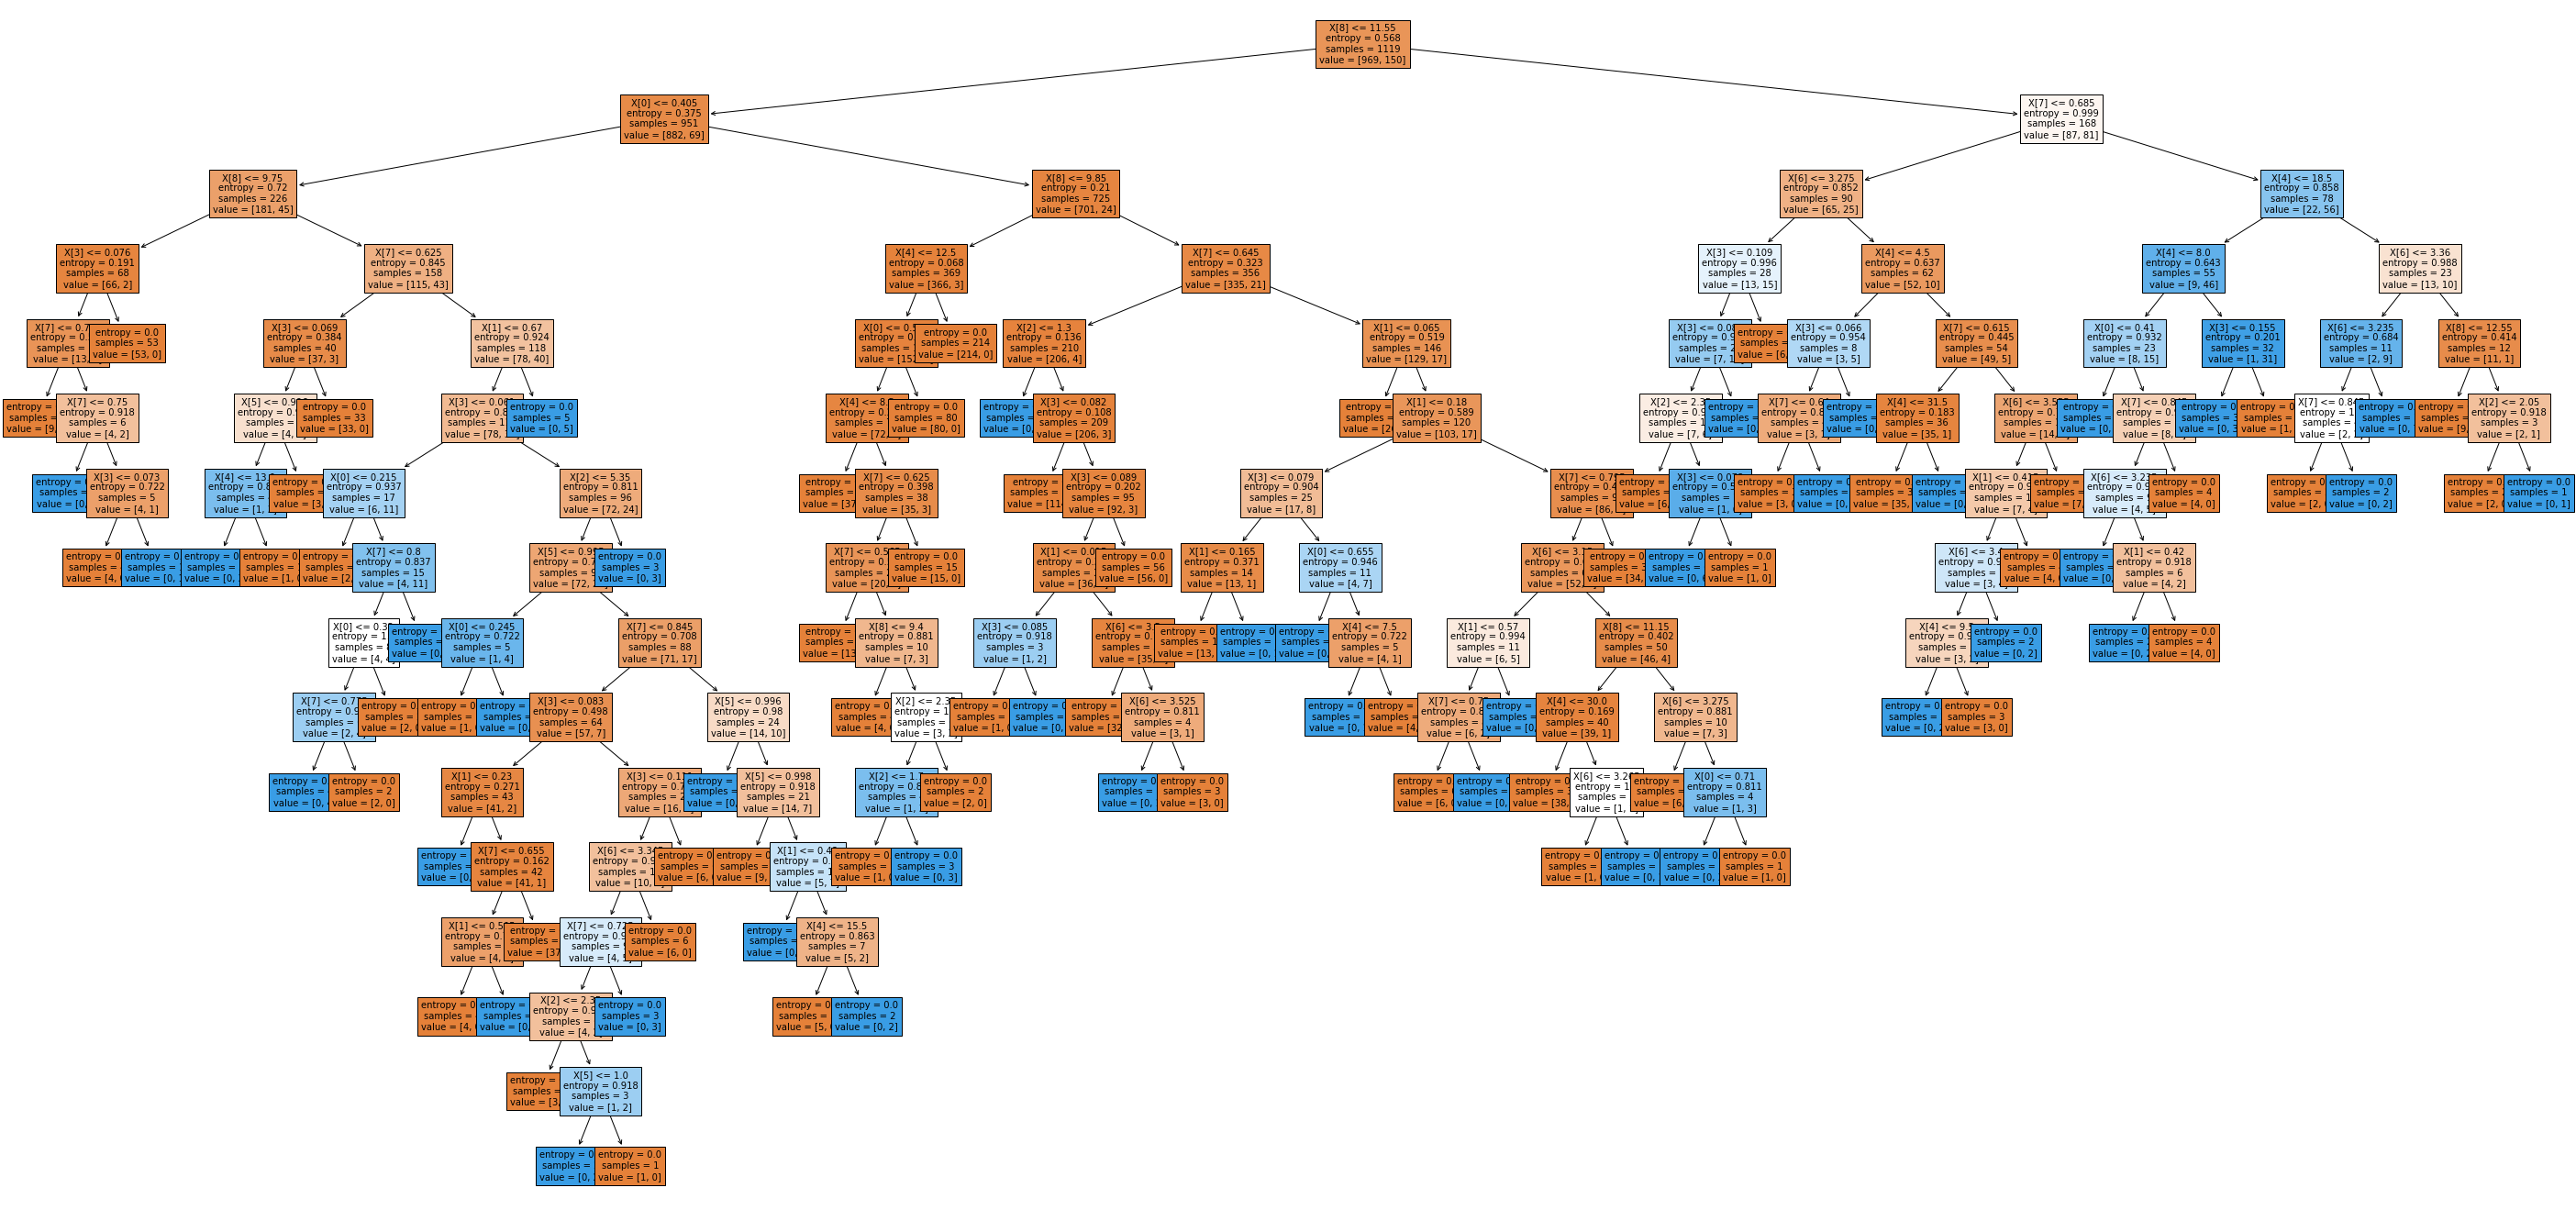

In [26]:
# Ve cay ID3
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [27]:
#Tạo cây CART 
clf = DecisionTreeClassifier(criterion='gini')

In [28]:
tree_pred = clf.fit(X_train, y_train).predict(X_test)

In [29]:
tree_score = metrics.accuracy_score(tree_pred, y_test)

In [30]:
print('Accuracy: ', tree_score)
print('Report: ', metrics.classification_report(tree_pred, y_test))

Accuracy:  0.8583333333333333
Report:                precision    recall  f1-score   support

         bad       0.90      0.93      0.92       399
        good       0.60      0.49      0.54        81

    accuracy                           0.86       480
   macro avg       0.75      0.71      0.73       480
weighted avg       0.85      0.86      0.85       480



In [31]:
tree_cm = metrics.confusion_matrix(tree_pred, y_test)

Text(0.5, 1, 'Decision Tree Accuracy Score: 0.86')

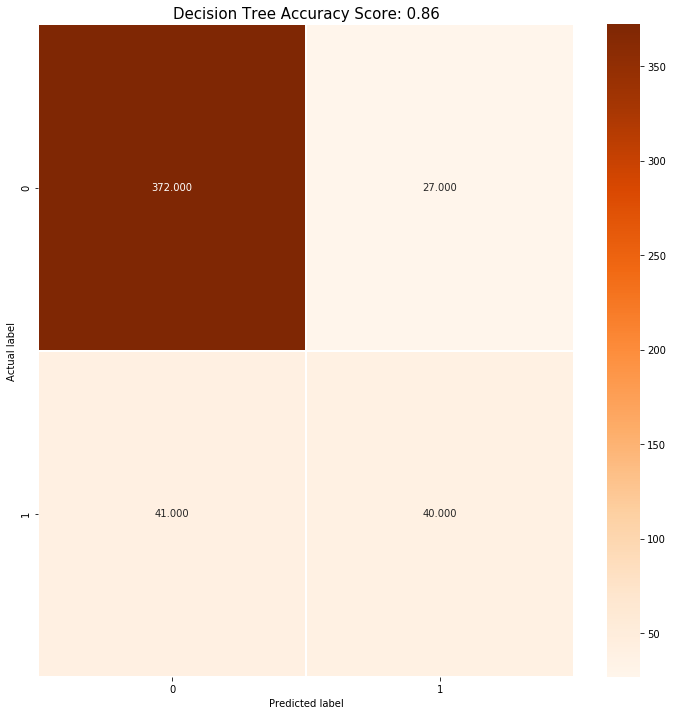

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, cmap='Oranges', fmt='.3f', linewidths=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Decision Tree Accuracy Score: {0}'.format(round(tree_score,2))
plt.title(title, size=15)

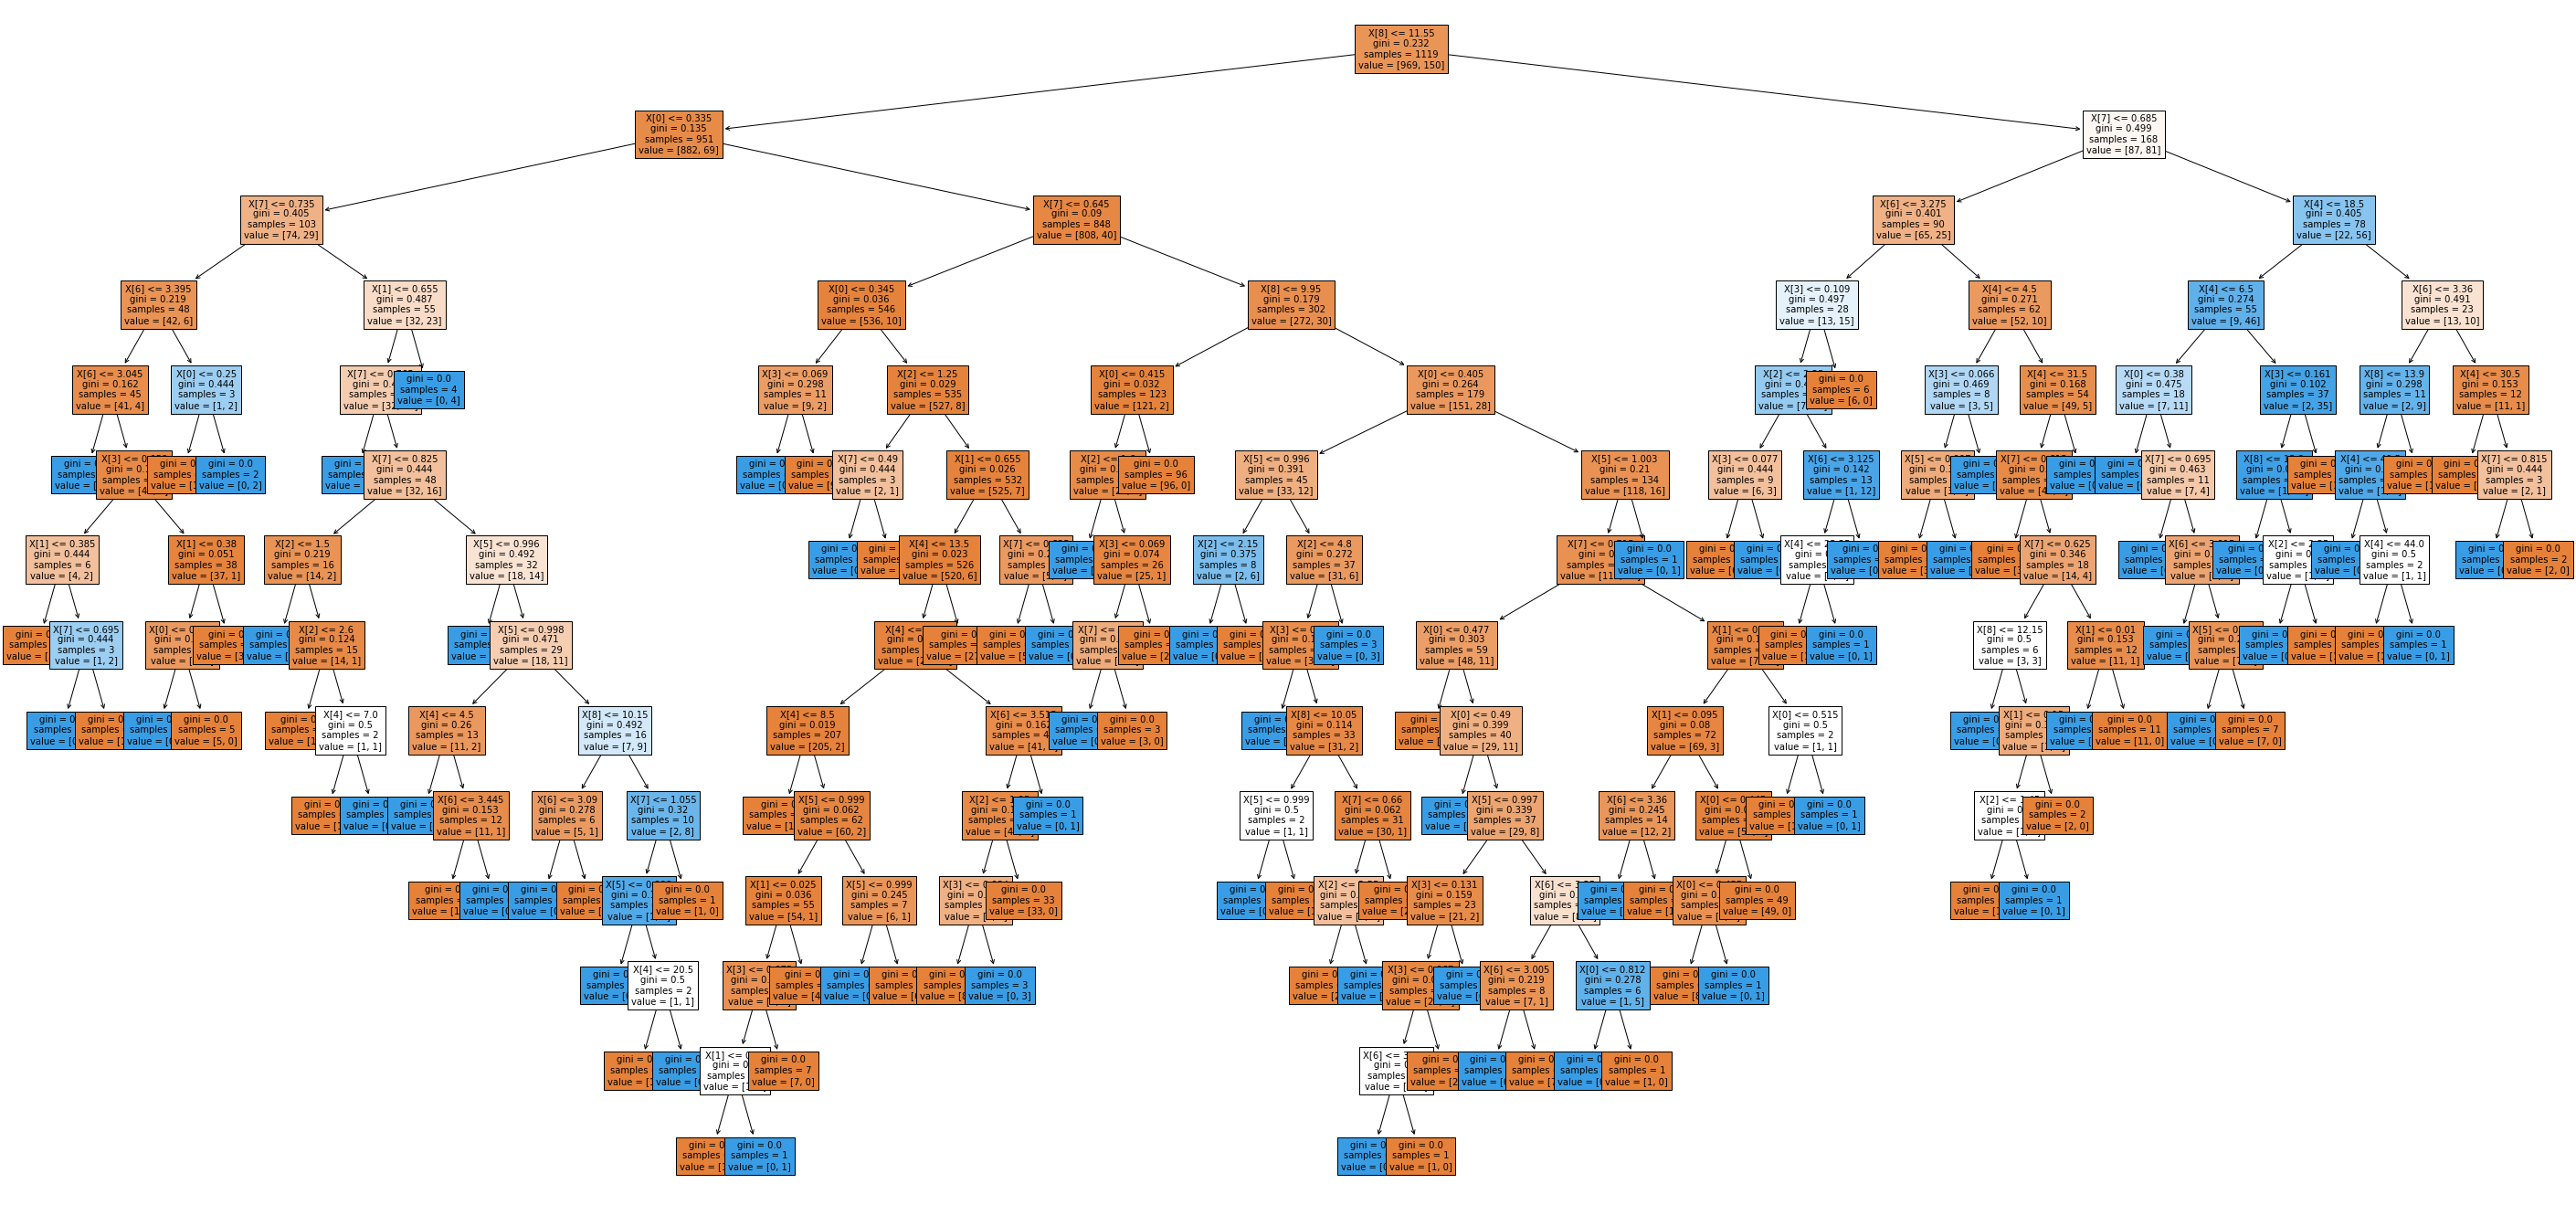

In [33]:
plt.subplots(figsize=(50,24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.show()

In [34]:
#Xay dựng mô hình bằng thuật toán Navie Bayes
gnb = GaussianNB()

In [35]:
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [36]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)

In [37]:
print('Accuracy: ', bayes_score)
print('Report:', metrics.classification_report(y_test, bayes_pred))

Accuracy:  0.84375
Report:               precision    recall  f1-score   support

         bad       0.94      0.87      0.91       413
        good       0.46      0.67      0.55        67

    accuracy                           0.84       480
   macro avg       0.70      0.77      0.73       480
weighted avg       0.87      0.84      0.86       480



In [38]:
#Tao ma tran nhầm lẫn
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

Text(0.5, 1, 'Naive Bayes Accuracy Score: 0.84375')

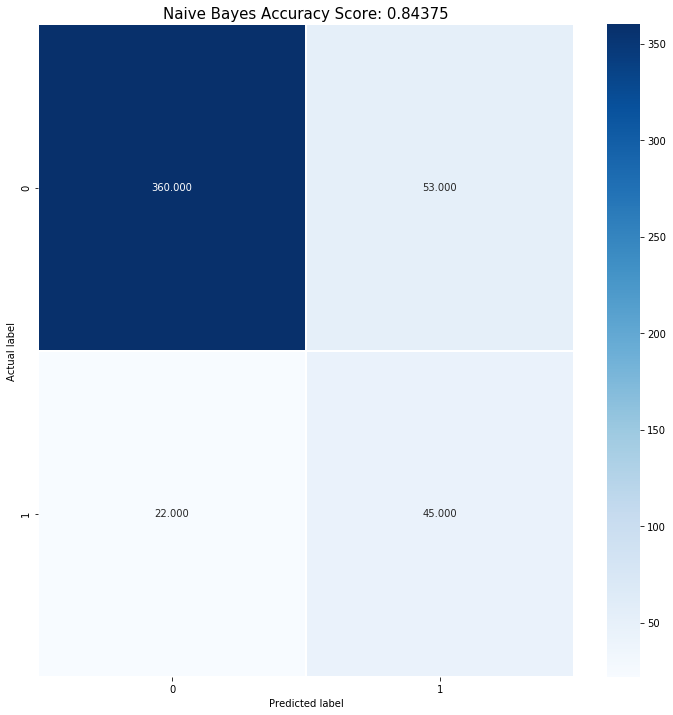

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, linewidths=1, cmap='Blues', fmt='.3f')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size=15)

In [41]:
data['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [42]:
len(data)

1599

## Nhận xét:
- Tất cả các mô hình đều chuẩn đoán rượu không ngon tốt hơn rượu ngon.
- So sánh theo kết quả đô chính xác của mô hình, thì mô hinh cây quyết định ID3 dự đoán kết quả tốt hơn 2 mô hình còn lại.
